# Classification with linear regression

In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats 

from sklearn.datasets.samples_generator import make_blobs

In [2]:
X, y = make_blobs(n_samples=100, centers= np.array([[-1],[1]]), n_features=1, shuffle=True, random_state=2017)

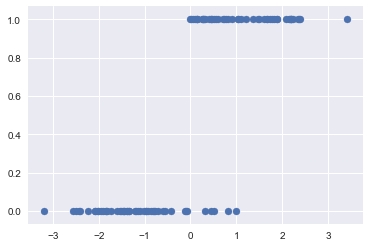

In [5]:
plt.scatter(X,y)

In [6]:
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression().fit(X,y)
xgrid = np.linspace(-3.5,3.5, 1000)
Xgrid = xgrid.reshape(-1,1)
Y = y.reshape(-1,1)
yp = lr.predict(X)
ypgrid = lr.predict(Xgrid)

In [24]:
x = X.flatten()

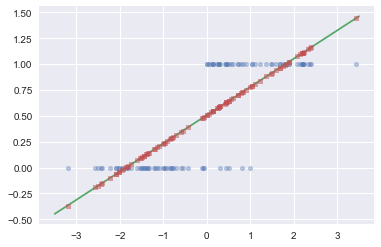

In [30]:
plt.plot(X,y,'o', alpha=0.4, ms=5)
plt.plot(xgrid, ypgrid)
plt.plot(x, yp, 's', alpha=.5, ms=5)

In [17]:
def makeyaprob(y):
    if y >=1.0:
        return 1.0
    elif y <= 0.0:
        return 0.0
    else:
        return y
vector_makeyaprob = np.vectorize(makeyaprob)
predict_proba = lambda lr, X: vector_makeyaprob(lr.predict(X))

In [18]:
ypfilt = vector_makeyaprob(ypgrid)

In [9]:
# ypfilt = np.zeros(xgrid.shape[0])
# def predicted_proba(x)
# for i,x in enumerate(xgrid):
#     if yp[i] >= 1.0:
#         ypfilt[i] = 1.0
#     elif yp[i] <= 0.0:
#         ypfilt[i] = 0.0
#     else:
#         ypfilt[i] = yp[i]

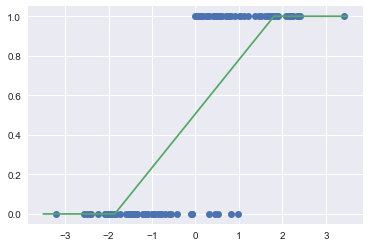

In [19]:
plt.plot(X,y,'o')
plt.plot(xgrid, ypfilt)

In [31]:
ypred = 1*(predict_proba(lr, X) >= 0.5)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y, ypred)

0.95